# Routh-Hurwitz Criterion

In [ ]:
#| default_exp routh_hurwitz_criterion

In [ ]:
#| include: false
%load_ext autoreload
%autoreload 2

In [ ]:
#| export
import numpy as np
import matplotlib.pyplot as plt
import control

In [ ]:
#| include: false
%matplotlib inline

## Background

- Given a system with transfer function $G(s) = \frac{N(s)}{D(s)}$: in order for a system to be stable, all the roots of its characteristic equation $D(s)=0$ must have $Re < 0$
- The roots of the characteristic equation $D(s)=0$ are the poles of the transfer function $G(s)$.

For example:

$$G(s) = \frac{1}{s+a}$$

whose inverse Laplace transform to get the time domain representation is:

$$\mathcal{L}^{-1}(G(s)) = e^{-at} = e^{st}$$

- if $a > 0$, the system is stable: signals go to zero as time goes to infinity.

- if $a < 0$, the system is unstable: the response of the system goes to infinity.

We can have more complex transfer functions:

$$G(s) = \frac{1}{s+a}\frac{1}{s+b}\frac{1}{s+c}...$$

and we know that we can always simplify a transfer function using partial fraction expansion:

$$G(s) = \frac{A}{s+a} + \frac{B}{s+b} + \frac{C}{s+c}...$$

and

$$\mathcal{L}^{-1}(G(s)) = Ae^{-at} + Be^{-bt} + Ce^{-ct}...$$

**If there is one root that is unstable, the system is unstable.**

- We know that we can determine the stability of the system calculating the roots of the characteristic equation

- Calculating the roots of a polynomial for $n>2$ is time consuming, and possibly even impossible in closed form

$$12s^5+14s^4+3s^3+s^2+16s+11=0$$

- We would like to determine stability (hence the roots of $D(s)=0$) without solving for the roots directly

- This is where the Routh-Hurwitz criterion can help us


------------

Routh–Hurwitz stability criterion
> _All the roots of a polinomial have $Re<0$ if and only if a certain set of algebraic combinations (i.e. fill out the RH array) of its coefficients have the same signs_

- The **Routh–Hurwitz stability criterion** is a mathematical test that is a necessary and sufficient condition for the stability of a linear time invariant (LTI) control system
- Determine whether all the roots of the characteristic polynomial of a linear system have negative real parts
- The importance of the criterion is that the roots $p$ of the characteristic equation of a linear system with negative real parts represent solutions $e^{pt}$ of the system that are stable (bounded). 
- The criterion provides a way to determine if the equations of motion of a linear system have only stable solutions, without solving the system directly



Given:

$$G(s) = \frac{N(s)}{D(s)}$$

- If all the signs of the coefficients are _NOT_ the same, then the system is **unstable**
   - e.g. $s^5+3s^3-4s^2+s+1$ $\rightarrow$ _unstable_
   
- If all the signs are the same, then the system can be stable or unstable

For example:

$$G(s) = \frac{1}{(s^2-s+4)(s+2)(s+1)}$$

the roots are $0.5\pm j1.9365$ (unstable roots), $-2, -1 \Rightarrow$ we have two roots with $Re > 0$.

If we write the characteristic equation however:

$$s^4+2s^3+3s^2+10s+8 = 0$$

- All coefficients have the same sign. We need to use the RHC and populate the Routh array

---------------

## Routh-Hurwitz array

A tabular method can be used to determine the stability when the roots of a higher order characteristic polynomial are difficult to obtain. 

For an $n$th-degree polynomial

$$
D(s)=a_{n}s^{n}+a_{{n-1}}s^{{n-1}}+\cdots +a_{1}s+a_{0}
$$

the table has $n + 1$ rows and the following structure:

|           |           |           |           |     |
|  ------   |  ------   |  ------   |  ------   | --- |
| $s^n$     | $a_{n}$   | $a_{n-2}$ | $a_{n-4}$ | $...$ |
| $s^{n-1}$ | $a_{n-1}$ | $a_{n-3}$ | $a_{n-5}$ | $...$ |
| $...$     | $b_1$     | $b_2$     | $b_3$     | $...$ |
| $...$     | $c_1$     | $c_2$     | $c_3$     | $...$ |
| $s^{1}$   | $...$     | $...$     | $...$     | $...$ |
| $s^{0}$   | $...$     | $...$     | $...$     | $...$ |




where the elements $b_{i}$ and $c_{i}$ can be computed as follows:

$$
{\displaystyle b_{i}={\frac {a_{n-1}\times {a_{n-2i}}-a_{n}\times {a_{n-(2i+1)}}}{a_{n-1}}}.}
$$

$$
{\displaystyle c_{i}={\frac {b_{1}\times {a_{n-(2i+1)}}-a_{n-1}\times {b_{i+1}}}{b_{1}}}.}
$$

- When completed, the number of sign changes in the first column will be the number of non-negative roots.

### Examples

$$G(s) = \frac{1}{(s^2-s+4)(s+2)(s+1)} = \frac{1}{s^4+2s^3+3s^2+10s+8}$$


|           |      |      |      |
|  ------   |  ------   |  -   |  -   |
| $s^4$     |  $1$   |  $3$   |  $8$   |
| $s^{3}$   |  $2$   | $10$   |      |
| $s^2$     |  $\frac{2\cdot3-1\cdot10}{2}=-2$  |   $\frac{2\cdot8-1\cdot0}{2}=8$     |      |
| $s^{1}$   |  $\frac{-2\cdot10-2\cdot8}{-2}=18$    |   $0$   |      |
| $s^{0}$   |  $\frac{18\cdot8-2\cdot0}{2}=8$    |      |      |


- Determine the number of roots in RHP by counting the number of sign changes in the first column: **the are two sign changes, hence there are two roots with $Re>0$**
- The system is unstable.

$$G(s) = \frac{1}{s^4+2s^3+3s^2+4s+5}$$


|           |      |      |      |
|  ------   |  ------   |  -   |  -   |
| $s^4$     |  $1$   |  $3$   |  $5$   |
| $s^{3}$   |  $2$   | $4$   |   $0$   |
| $s^2$     |  $\frac{2\cdot3-1\cdot4}{2}=1$  |   $\frac{2\cdot5-1\cdot0}{2}=5$     |      |
| $s^{1}$   |  $\frac{1\cdot4-2\cdot5}{1}=-6$    |   $0$   |      |
| $s^{0}$   |  $\frac{-6\cdot5-1\cdot0}{-6}=5$    |      |      |

- We have two roots with $Re>0$

- Roots: $-1.28\pm j0.858, 0.28\pm j1.416$

### Routh-Hurwitz criterion: special cases

### Special case 1)

- A zero in a row with at least one non-zero appearing later in the row
- The system is always unstable
- We can still fill out the table to know how many are unstable

- Example 1:

$$G(s) = \frac{1}{1s^4+2s^3+0s^2+3s+4}$$


|           |      |      |      |
|  ------   |  ------   |  -   |  -   |
| $s^4$     |  $1$   |  $0$   |  $4$   |
| $s^{3}$   |  $2$   | $3$   |   $0$   |
| $s^2$     |  $\frac{2\cdot0-1\cdot3}{2}=\frac{-3}{2}$  |    |      |
| $s^{1}$   |     |     |      |
| $s^{0}$   |      |      |      |

We can already say that the system is unstable


- Example 2:
$$G(s) = \frac{1}{1s^4+2s^3+2s^2+4s+5}$$

|           |      |      |      |
|  ------   |  ------   |  -   |  -   |
| $s^4$     |  $1$   |  $2$   |  $5$   |
| $s^{3}$   |  $2$   | $4$   |   $0$   |
| $s^2$     |  $0 \rightarrow \epsilon$  |   $5$    |      |
| $s^{1}$   |  $\frac{\epsilon\cdot4-2\cdot5}{\epsilon}$    |   $0$   |      |
| $s^{0}$   |  $5$    |      |      |

- To calculate the coefficients we need to calculate the values for 
$\lim \limits_{\epsilon\rightarrow0} $

|           |      |      |      |
|  ------   |  ------   |  -   |  -   |
| $s^4$     |  $1$   |  $2$   |  $5$   |
| $s^{3}$   |  $2$   | $4$   |   $0$   |
| $s^2$     |  $0^+$  |   $5$    |      |
| $s^{1}$   |  $4-\frac{10}{\epsilon} = -\infty$    |   $0$   |      |
| $s^{0}$   |  $5$    |      |      |

- We have two roots with $Re > 0$

### Special case 2)

- An entire row is zeros

$$G(s) = \frac{1}{1s^5+2s^4+6s^3+10s^2+8s+12}$$

|           |      |      |      |
|  ------   |  ------   |  -   |  -   |
| $s^5$     |  $1$   |  $6$   |  $8$   |
| $s^4$     |  $2$   |  $10$   |  $12$   |
| $s^{3}$   |  $1$   | $2$   |   $0$   |
| $s^2$     |  $6$   |   $12$    |  $0$    |
| $s^{1}$   |  $0$   |   $0$   |   $0$   |
| $s^{0}$   |  $?$   |      |      |


- There are only 3 possible conditions that can lead to a Routh array with all zeros in a row:
  - two real roots, equal and opposite in sign $\Rightarrow$ **unstable**
  - two imaginary roots, that are complex conjugate of each other $\Rightarrow$ **marginally stable - response is oscillatory**
  - four roots that are all equal distance from the origin $\Rightarrow$ **unstable**
  
<tr>
<td> <img src="img/rhc-all-cases.png" alt="rhc-all-cases" style="width: 900px;"/> </td>
</tr>  

- To determine the system stability:

- Here is the original table:
|           |      |      |      |
|  ------   |  ------   |  -   |  -   |
| $s^5$     |  $1$   |  $6$   |  $8$   |
| $s^4$     |  $2$   |  $10$   |  $12$   |
| $s^{3}$   |  $1$   | $2$   |   $0$   |
| $s^2$     |  $6$   |   $12$    |  $0$    |
| $s^{1}$   |  $0$   |   $0$   |   $0$   |
| $s^{0}$   |  $?$   |      |      |

  - We build the **auxiliary polinomial** using the row right above the one that is zero:
     - Those are the coefficients of the auxiliary polinomial
     -  $p(s)=6s^2+12s^0=0 \rightarrow p(s)=s^2+2$
     - Note that we are skipping every other power
  - Take the derivative of $p(s)$:
     $\frac{d}{ds}p(s)=2s$
     and replace the all zero row with the coefficient of $\frac{d}{ds}p(s)$
  - Complete the table as we would normally
 
 
 |           |      |      |      |
|  ------   |  ------   |  -   |  -   |
| $s^5$     |  $1$   |  $6$   |  $8$   |
| $s^4$     |  $2$   |  $10$   |  $12$   |
| $s^{3}$   |  $1$   | $2$   |   $0$   |
| $s^2$     |  $6$   |   $12$    |  $0$    |
| $s^{1}$   |  $2$   |   $0$   |   $0$   |
| $s^{0}$   |  $12$   |      |      |

- No sign changes in the first column, hence no roots with $Re >0$.
- This means that the system must have two imaginary roots and is marginally stable.

### Additional comments:

- The auxiliary polinomial $p(s)$ exists if and only if there is an all zero row in the routh array, and it is a factor of the original polinomial $q(s)$ (it divides the original polinomial with no reminder):

$$p(s)r(s)=q(s)$$

- This makes it possible to calculate how many roots have $Re<0$, how many $Re=0$ and how many $Re>0$

- We can determine $r(s) = \frac{q(s)}{p(s)}$ (polinomial division)

In our case:

$$
(s^5+2s^4+6s^3+10s^2+8s+12)\;\; :\;\; (s^2+2)
$$

$$\Downarrow$$

$$
r(s) = s^3 + 2s^2+4s+6
$$

and this means:
$$
q(s)= (s^2+2)(s^3 + 2s^2+4s+6)
$$

- Only true if we have a row of all zeros, or we will have some non zero reminder when we do the division

If we now re-write our table here:

 |           |      |      |      |
|  ------   |  ------   |  -   |  -   |
| $s^5$     |  $1$   |  $6$   |  $8$   |
| $s^4$     |  $2$   |  $10$   |  $12$   |
| $s^{3}$   |  $1$   | $2$   |   $0$   |
| $s^2$     |  $6$   |   $12$    |  $0$    |
| $s^{1}$   |  $2$   |   $0$   |   $0$   |
| $s^{0}$   |  $12$   |      |      |



- Any part of the table above the auxiliary polinomial $p(s)=6s^2+12 = s^2+2$ is due to the factor $r(s)=s^3 + 2s^2+4s+6$, and since there are not sign changes we can say that $r(s)$ is stable.
- The other part of the table is due to the auxiliary polinomial $p(s)$: the number of sign changes after $p(s)$ in the table predicts the number of $Re>0$ roots for $p(s)$

- Given that we have $p(s) = s^2+2 \Rightarrow s = \sqrt{-2} = \pm j\sqrt{2} \Rightarrow$ Two complex conjugate roots, the system is marginally stable (what we expected)

## Practical uses: beyond stability

- How can we use the Routh Criterion for more than just assessing stability

Suppose you have an open loop system:

$$
G(s) =\frac{1}{s^4+6s^3+11s^2+6s+2}
$$

And we can verify its step response:

In [ ]:
# Import relevant libraries (we have imported them already so we comment these out)
# import control
# import matplotlib.pylab as plt

In [ ]:
sys = control.tf([1], [1, 6, 11, 6, 2])
T, yout = control.step_response(sys)

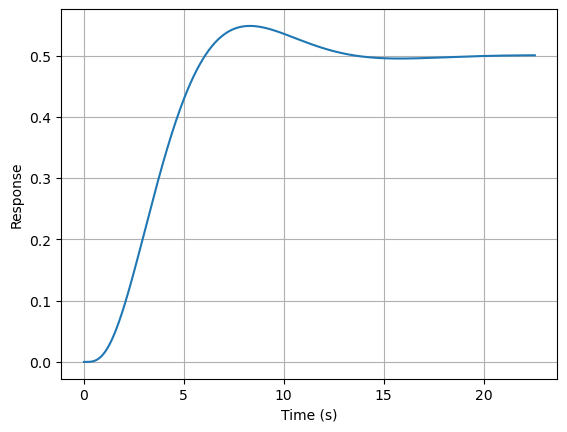

In [ ]:
fig = plt.figure()

plt.plot(T, yout)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Response');

Design requirement:
- improve system response time

We can add feedback:


<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/rhc-beyond-stability-1.png" alt="rhc-beyond-stability" style="width: 500px;"/> </td>
</tr>
</table>

- $U(s)$ is the reference signal (e.g. desired angle, etc.)
- Note that the feedback path is unitary: perfect sensor (it always knows the output signal (e.g. system angle) with no delay or error)
- We want to tune the gain $K$ to get the response that we desire
   - Adjusting the gain increases the amplitude of the signal (err)
   - In an open loop linear system we can increase the amplitude "as much as we want" (it does not affect stability)
   - The feedback loop however changes the dynamics
   
- Typical requirement: **increase the gain large enough to meet our requirements (e.g. fastest response) while keeping the system stable**


- Let's assess the closed loop stability using RHC

- 1. Simplify the block diagram:
    $$
    \hat{G}(s) = \frac{\frac{K}{s^4+6s^3+11s^2+6s+2}}{1+\frac{K}{s^4+6s^3+11s^2+6s+2}} = \frac{K}{s^4+6s^3+11s^2+6s+2 + K}
    $$
  
  The new characteristic equation for the closed loop system is:
  $$  
  s^4+6s^3+11s^2+6s+2 + K = 0
  $$
  
- 2. Build the Routh array

|           |      |      |      |
|  ------   |  ------   |  -   |  -   |
| $s^4$     |  $1$   |  $11$   |  $24+K$   |
| $s^{3}$   |  $6$   | $6$   |   $0$   |
| $s^2$     |  $10$  |   $K+2$    |      |
| $s^{1}$   |  $48-6K$    |     |      |
| $s^{0}$   |  $K+2$    |      |      |

- To have asymptotic stability:
  - $48-6K > 0 \rightarrow K < 8$ 
  - $K+2>0 \rightarrow K > -2$
  - Stability range is $-2 < K < 8$
  
- When $K=-2$, we have a pole at the origin
- When $K=8$, we have a pair of imaginary poles and the system is marginally stable
  
- We know the gain margin that we have before the system becomes unstable
- We do not know where the poles are exactly (we only know when they cross the imaginary axis)

In [ ]:
K = 2 #8

In [ ]:
sys = control.tf([K], [1, 6, 11, 6, 2+K])
T_k, yout_k = control.step_response(sys)

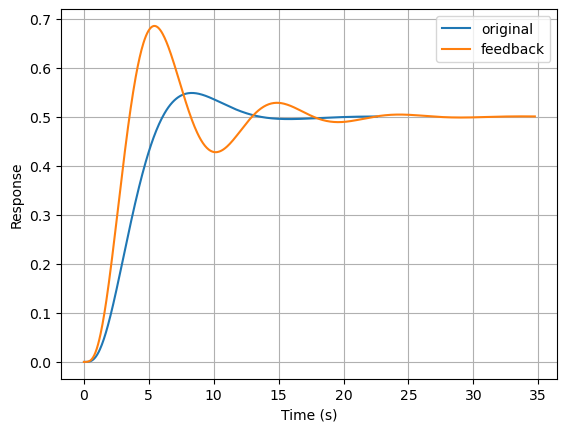

In [ ]:
fig = plt.figure()

plt.plot(T, yout, label='original')
plt.plot(T_k, yout_k, label='feedback')
plt.grid()
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Response');

### Example 2

Suppose you have an open loop system:

$$
G(s) =\frac{1}{s^4+10s^3+35s^2+50s+24} = \frac{1}{(s+1)(s+2)(s+3)(s+4)}
$$

And we can plot its step response:

In [ ]:
sys = control.tf([1], [1, 10, 35, 50, 24])
T, yout = control.step_response(sys)

Text(0, 0.5, 'Response')

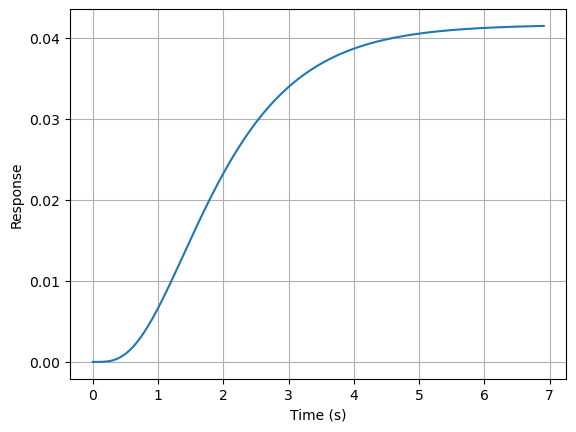

In [ ]:
fig = plt.figure()

plt.plot(T, yout, label='original')
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Response')

Design requirement:
- improve system response time

We can add feedback:


<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/rhc-beyond-stability-1.png" alt="rhc-beyond-stability" style="width: 500px;"/> </td>
</tr>
</table>

- $U(s)$ is the reference signal (e.g. desired angle, etc.)
- Note that the feedback path is unitary: perfect sensor (it always knows the output signal (e.g. system angle) with no delay or error)
- We want to tune the gain $K$ to get the response that we desire
   - Adjusting the gain increases the amplitude of the signal (err)
   - In an open loop linear system we can increase the amplitude as much as we want
   - The feedback loop however changes the dynamics
- Typical requirement: increase the gain large enough to meet our requirements (e.g. fastest response) while keeping the system stable

- Let's assess the closed loop stability using RHC

- 1. Simplify the block diagram:
    $$
    \hat{G}(s) = \frac{\frac{K}{s^4+10s^3+35s^2+50s+24}}{1+\frac{K}{s^4+10s^3+35s^2+50s+24}} = \frac{K}{s^4+10s^3+35s^2+50s+24 + K}
    $$
  
  The new characteristic equation for the closed loop system is:
  $$  
  s^4+10s^3+35s^2+50s+24 + K = 0
  $$
  
- 2. Build the Routh array

|           |      |      |      |
|  ------   |  ------   |  -   |  -   |
| $s^4$     |  $1$   |  $35$   |  $24+K$   |
| $s^{3}$   |  $10$   | $50$   |   $0$   |
| $s^2$     |  $\frac{10\cdot35-50}{10}=30$  |   $24+K$    |      |
| $s^{1}$   |  $42-\frac{K}{3}$    |     |      |
| $s^{0}$   |  $24+K$    |      |      |

- How many sign changes?
  - $42-K/3 > 0 \rightarrow K < 126$ 
  - $K > -24$
  - and solving the system of equations: $K < 126$
    
- When $K=-24$ we have a pole at the origin
- When $K = 126$ the poles would be going from $Re<0$ to $Re>0$ (imaginary poles) and the system would be marginally stable

Again,
- We know the gain margin that we have
- We do not know where the poles are exactly (we only know when they cross the imaginary axis)

In [ ]:
K = 126

In [ ]:
sys = control.tf([K], [1, 10, 35, 50, 24+K])
T_k, yout_k = control.step_response(sys)

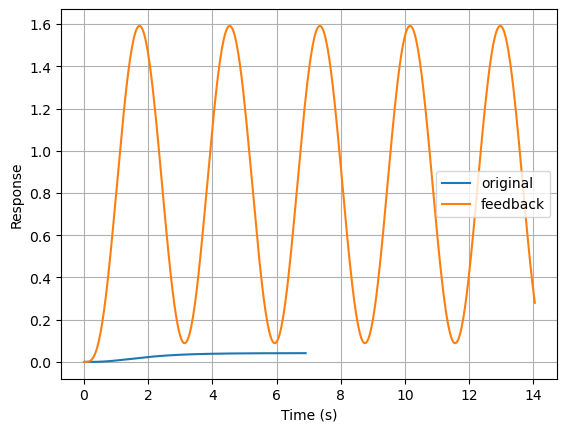

In [ ]:
fig = plt.figure()

plt.plot(T, yout, label='original')
plt.plot(T_k, yout_k, label='feedback')
plt.grid()
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Response');

### Having additional requirements: time to half

- Speed of the response depends on the position of the poles on the real axis
   - The further from the imaginary axis, the faster the response (true for both stable and unstable poles)
   - When $s=j\omega$ (imaginary poles), the response is a sinusoid ($e^{j\omega}$ is a sinusoid)
   - the closer the poles are to the real axis, the slower the frequency of the response (i.e., slower oscillation)

- The time to half is the time for a signal to half (or double, if unstable) the initial signal in magnitude
- Typical requirement, especially when dealing with systems that interact with humans: the system should not be too fast or too slow to respond

- A time to half requirements is a requirement on the real part of the poles
- We would like the poles to be to the left of a line called the _z-line_

- Set $s=z+\sigma_{des}$
  - When $z=0$, $s=+\sigma_{des}$, and the poles have the desired real part.

- Given a characteristic equation $D(s)=0$
$$
s^3+5s^2+25s+30=0
$$

we replace $s=z+\sigma_{des}$ (e.g $\sigma_{des}$=-1)

$$
(z-1)^3+5(z-1)^2+25(z-1)+30=0
$$

$$
\Downarrow
$$

$$
z^3+2z^2+18s+9=0
$$

- We can now use the Routh array to verify if the system has any roots to the right of the _z-line_

|           |      |      |      |
|  ------   |  ------   |  -   |  -   |
| $s^3$     |  $1$   |  $18$   |     |
| $s^{2}$   |  $2$   | $9$   |      |
| $s^1$     |  $\frac{27}{2}$  |     |      |
| $s^{0}$   |  $9$    |     |      |

- No sign changes in the first column: all roots are to the left side of $s=-1$.

### RHC Final Comments

- RHC provides necessary and sufficient conditions to analyse the stability of a system
- The stability analysis can be done with respect to any parameters of the system (including the gain $K$)
- Building the routh array:
  - when we have an all zero row, the roots of the auxiliary polynomial are a subset of the roots of the original polinomial (i.e., of the characteristic equation of the system)
  - the roots of the auxiliary polynomial are symmetric with respect to the origin (i.e., wrt real and imaginary axis).